# Analysis of best fitness values

In [42]:
import os
import pickle
from itertools import product

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pycgp import probabilistic_mutation, point_mutation, single_mutation
from pycgp.gems import MatchByActiveStrategy, MatchSMStrategy, MatchPMStrategy

mutations = [
        #(probabilistic_mutation, MatchSMStrategy),
        (point_mutation, MatchPMStrategy),
        (single_mutation, MatchSMStrategy),
        #(single_mutation, MatchByActiveStrategy),
        (probabilistic_mutation, MatchByActiveStrategy)
]

gems = [0, 5, 10]
cols = [10, 50, 100]

def iterate_folder(folder):
    for index, ((mutation, strategy), gem, column) in enumerate(product(mutations, gems, cols)):
        file = os.path.join(folder,  f'{mutation.__name__}-{strategy.__name__}-gems{gem}-n_cols{column}.csv')
        with open (file, 'rb') as fp:
            data = pickle.load(fp)
        
        yield mutation.__name__, strategy.__name__, gem, column, data
    

In [60]:
def density_plots(folder, value_gttr):
    best = []

    for raw in iterate_folder(folder):
            m, s, g, c, data = raw
            best.append([g, m, s] + [value_gttr(x) for x in data])

    df = pd.DataFrame(best)
    df.columns = ['gems', 'mutation', 'strategy', *list(range(1,21))]

    _, axs = plt.subplots(1,3, figsize=(12,3))

    choices = [
        (point_mutation.__name__, MatchPMStrategy.__name__),
        (single_mutation.__name__, MatchSMStrategy.__name__),
        (probabilistic_mutation.__name__, MatchByActiveStrategy.__name__)
    ]

    titles = ['Point mutation', 'Single mutation', 'Probabilistic mutation']
    
    ylims = [
        (0, 20), (0, 20), (0, 20)
    ]
    
    for i, (m, s) in enumerate(choices):
        avgs = []
        nonzero = []
        for g in gems:
            d = df[(df.mutation == m) & (df.strategy == s)]
            values = d.iloc[:,3:][d.gems == g].values.flatten()
            sns.kdeplot(values, ax=axs[i], label=g, shade=True)
            avgs.append(np.mean(values)*100)
            nonzero.append(np.count_nonzero(values == 0))
            
        axs[i].set_title('{}\n{}\n0 - {:3f}, {}\n5 - {:3f}, {}\n10 - {:3f}, {}'.format(m,s,avgs[0], nonzero[0], avgs[1], nonzero[1], avgs[2], nonzero[2]))
        print('{}\n{}\n0 - {:3f}, {}\n5 - {:3f}, {}\n10 - {:3f}, {}'.format(m,s,avgs[0], nonzero[0], avgs[1], nonzero[1], avgs[2], nonzero[2]))
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('Accuracy score')
        axs[i].set_ylim(ylims[i])
        axs[i].set_xlim(0.75, 1)
    print(df.groupby('gems').median().mean(axis=1))

point_mutation
MatchPMStrategy
0 - 91.737856, 0
5 - 91.896985, 0
10 - 91.917923, 0
single_mutation
MatchSMStrategy
0 - 92.332496, 0
5 - 92.709380, 0
10 - 92.751256, 0
probabilistic_mutation
MatchByActiveStrategy
0 - 92.257119, 0
5 - 92.365997, 0
10 - 92.349246, 0
gems
0     0.926759
5     0.928894
10    0.928392
dtype: float64


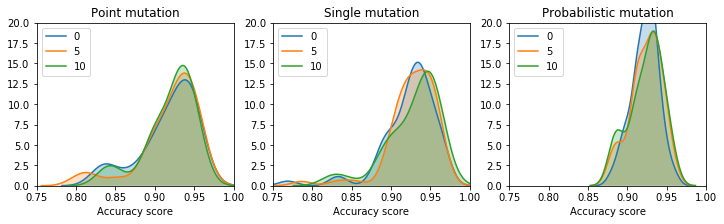

In [61]:


def best_of_run_kdes(folder):
    density_plots(folder, lambda x: -x['best'].fitness)

folders = [
    'scripts/bin_class_out//'
]
for x in folders:
    best_of_run_kdes(x)

plt.savefig('figures/bc-kdes.pdf', dpi=1000, bbox_inches='tight')
    

In [45]:
data = []
ldata = {}

for m, s, g, c, d in iterate_folder('scripts/bin_class_out/'):
    values = [-x['test_error'] for x in d]
    stats = [g, c, np.max(values)*100, np.mean(values)*100, np.std(values)]
    data.append([m, s] + stats)
    ldata[f'{m}-{s}-{g}-{c}'] = stats
    
data = pd.DataFrame([*data]) 
data.columns = ['mutation', 'strategy', 'gems', 'columns', 'min', 'mean', 'std']
#data

In [46]:
for k, v in ldata.items():
    row_str = '{} & {} & {:.2f} & {:.2f}\\pm {:.3f}'.format(*v)
    print(row_str)

0 & 10 & 94.15 & 86.96\pm 0.036
0 & 50 & 92.98 & 89.53\pm 0.027
0 & 100 & 95.91 & 90.32\pm 0.031
5 & 10 & 91.81 & 86.93\pm 0.032
5 & 50 & 93.57 & 88.30\pm 0.042
5 & 100 & 94.15 & 90.53\pm 0.015
10 & 10 & 92.98 & 86.99\pm 0.040
10 & 50 & 94.15 & 89.09\pm 0.027
10 & 100 & 94.15 & 89.56\pm 0.026
0 & 10 & 91.23 & 87.22\pm 0.039
0 & 50 & 92.98 & 90.32\pm 0.020
0 & 100 & 93.57 & 90.06\pm 0.024
5 & 10 & 92.98 & 88.07\pm 0.044
5 & 50 & 94.74 & 90.35\pm 0.027
5 & 100 & 94.15 & 89.36\pm 0.025
10 & 10 & 92.98 & 88.16\pm 0.027
10 & 50 & 94.74 & 90.41\pm 0.049
10 & 100 & 94.74 & 90.56\pm 0.020
0 & 10 & 91.81 & 89.15\pm 0.022
0 & 50 & 94.74 & 89.53\pm 0.028
0 & 100 & 95.32 & 90.58\pm 0.021
5 & 10 & 93.57 & 88.80\pm 0.029
5 & 50 & 93.57 & 89.65\pm 0.020
5 & 100 & 94.15 & 90.70\pm 0.020
10 & 10 & 93.57 & 88.80\pm 0.029
10 & 50 & 94.15 & 90.15\pm 0.023
10 & 100 & 94.15 & 90.70\pm 0.020


In [339]:
data = []

for m, s, g, c, d in iterate_folder('scripts/symbolic_basic'):
    if c != 100:
        continue
    values = [x['best'].fitness for x in d]
    data.append([m, s, g, *values])

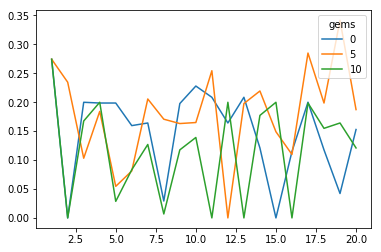

In [341]:
dd = pd.DataFrame(data)
dd.columns = ['m','s', 'gems', *list(range(1,21))]
dd.groupby('gems').min().iloc[:,2:].T.plot()